<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF_2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install TensorFlow
!pip install -q TensorFlow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3 MB 44 kB/s 
     |████████████████████████████████| 449 kB 88.0 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 3.8 MB 51.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
2.0.0


In [2]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-06-24 18:24:37--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-06-24 18:24:37 (43.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [11]:
#Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) #make it a 2-d array of size N x D where D=! (ahora ya esta en Vertical
Y = data[:,1] #(Aquí esta en Horizontal)

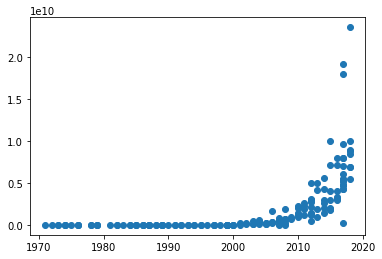

In [13]:
#Plot the data - it is exponential!
plt.scatter(X,Y)

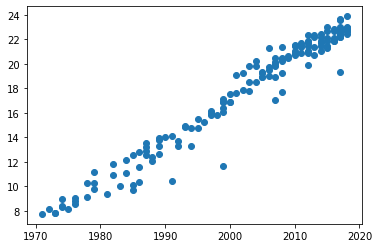

In [15]:
#since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X,Y)

In [16]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later

X = X - X.mean() #Hay muchas maneras pero para facilitar ahora la reversa, solo haremos esto

In [17]:
#Not create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
#model.compile(optimizer='adam', loss='mse')

In [20]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 4ms/sample - loss: 554.4829
Epoch 2/200
162/162 [==============================] - 0s 132us/sample - loss: 447.1505
Epoch 3/200
162/162 [==============================] - 0s 115us/sample - loss: 450.7776
Epoch 4/200
162/162 [==============================] - 0s 122us/sample - loss: 271.9038
Epoch 5/200
162/162 [==============================] - 0s 114us/sample - loss: 204.2452
Epoch 6/200
162/162 [==============================] - 0s 206us/sample - loss: 203.5746
Epoch 7/200
162/162 [==============================] - 0s 150us/sample - loss: 144.1809
Epoch 8/200
162/162 [==============================] - 0s 121us/sample - loss: 111.0641
Epoch 9/200
162/162 [==============================] - 0s 119us/sample - loss: 62.2759
Epoch 10/200
162/162 [==============================] - 0s 224us/sample - loss: 39.8399
Epoch 11/200
162/162 [==============================] - 0s 135us/sample - loss: 29.6650
Epoch 12/200
1

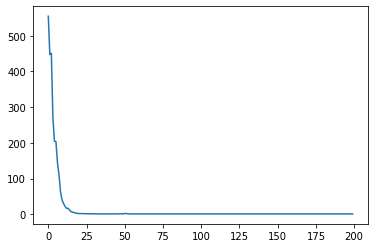

In [23]:
#plot the loss
plt.plot(r.history['loss'], label='loss')

In [25]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistors count
print(model.layers) #Note: there is only 1 layer, the "input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34426075]], dtype=float32), array([17.754269], dtype=float32)]


In [27]:
#The slope of the line is:

a = model.layers[0].get_weights()[0][0,0]
#El resultado es la t en la ecuación C=A*^t

0.34426075

In [30]:
print ("Time to double:", np.log(2)/a)

Time to double: 2.0286295205239204


In [29]:
# if you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X)-X.mean()*X.sum()
a = (X.dot(Y)-Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
print(a,b)
print("Time to double:", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
